In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np 
import cv2
import os
import glob
import matplotlib.pyplot as plt
from PIL import Image

print("packages loaded")

packages loaded


In [32]:
  # Define the patient id on the next line!!
path='/content/drive/My Drive/Blobdetector/data/P0026'  # Put upto patient id
maskfile = sorted(glob.glob('%s/Mask/*.tif' % path))

# idpath=glob.glob('%s/*' % path)
# print(idpath)

# for i in idpath:
#   directory = os.path.join(i,"Masknew")
#   if not os.path.exists(directory):
#       os.makedirs(directory)

directory = os.path.join(path,"Masknew")
if not os.path.exists(directory):
    os.makedirs(directory)

masknewpath=glob.glob('%s/Masknew' % path)
print(masknewpath)
print(maskfile)

['/content/drive/My Drive/Blobdetector/data/P0026/Masknew']
['/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260001.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260002.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260003.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260004.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260005.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260006.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260007.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260008.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260009.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260010.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260011.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260012.tif', '/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260013.tif', '/content/drive/My Drive/Blob

In [33]:
len(maskfile)
# maskfile[]


156

In [34]:
mask1path= maskfile[0]  #single mask image path
print(mask1path)
print(masknewpath[0])
head_tail = os.path.split(mask1path)
base=head_tail[1]
print(head_tail[0])
print(head_tail[1])
basename=os.path.splitext(base)[0]
test= os.path.join(masknewpath[0],basename+"_"+"01"+".tif")
print(test)

/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260001.tif
/content/drive/My Drive/Blobdetector/data/P0026/Masknew
/content/drive/My Drive/Blobdetector/data/P0026/Mask
P00260001.tif
/content/drive/My Drive/Blobdetector/data/P0026/Masknew/P00260001_01.tif


In [35]:
for j in range(0,len(maskfile)):  
  mask1path= maskfile[j]  #single mask image path
  print(mask1path)
  mask1=cv2.imread(mask1path, cv2.IMREAD_GRAYSCALE)
  # h,w=mask1.shape
  head_tail= os.path.split(mask1path)
  base=head_tail[1]
  basename=os.path.splitext(base)[0]
  #Get Contours
  ret, thresh = cv2.threshold(mask1, 127, 255, 0)
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contoursnew = []
  for cnt in contours:
    if cv2.contourArea(cnt)>5000:
      contoursnew.append(cnt)

  # calculate area and filter into new array
  for i in range(0,len(contoursnew)):
    imnum=i+1
    img = np.zeros( (512,512))
    cv2.fillPoly(img, [contoursnew[i]], 255)
    im = Image.fromarray(img.astype(np.uint8))
    #cv2.imwrite(os.path.join(masknewpath[0],basename+"_"+str(imnum)+".tif"),img)
    im.save(os.path.join(masknewpath[0],basename+"_"+str(imnum)+".tif"))  #32bit

# newmaskfiles = sorted(glob.glob('%s/*.tif' % masknewpath[0]))
# print("total new masks number: ",len(newmaskfiles))

/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260001.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260002.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260003.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260004.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260005.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260006.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260007.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260008.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260009.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260010.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260011.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260012.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260013.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260014.tif
/content/drive/My Drive/Blobdetector/data/P0026/Mask/P00260015

In [31]:
newmaskfiles = glob.glob('%s/*' % masknewpath[0])
print("total new masks number: ",len(newmaskfiles))


total new masks number:  105


mask files are: ['/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0004.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0003.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0005.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0002.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0001.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0011.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0006.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0010.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0009.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0007.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0015.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0012.tif', '/content/drive/My Drive/Blobdetector/data/P0016/Mask/P0016-ALL-0014.tif', '/conten

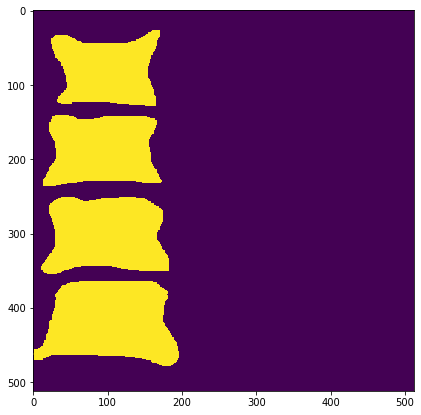

In [0]:
 
# #ALL FOLDER TEST

# ## Single folder test
# maskpath = '/content/drive/My Drive/Blobdetector/data/P0016/Mask'
# maskfile = glob.glob('%s/*.tif' % maskpath)


# masknewpath = '/content/drive/My Drive/Blobdetector/data/P0016/Masknew'  #where separated masks will be saved

# print("mask files are:", maskfile)
# n_images= len(maskfile)
# print("Number of images:", n_images)

# # Sample image
# mask1path= maskfile[0]
# print(mask1path)
# mask1=cv2.imread(mask1path, cv2.IMREAD_GRAYSCALE)
# h,w=mask1.shape

# plt.rcParams["figure.figsize"] = (7,7) 
# plt.imshow(mask1)
# plt.show()

In [0]:


# #Get Contours
# ret, thresh = cv2.threshold(mask1, 127, 255, 0)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours_area = []
# # calculate area and filter into new array
# for i in range(0,len(contours)):
#   img = np.zeros( (h,w))
#   cv2.fillPoly(img, pts = [contours[i]], color=(255,255,255))
#   img.astype('uint8')
#   im = Image.fromarray(img)
#   im.save(os.path.join(masknewpath,"P0016_"+str(i)+".tif"))  #32bit


In [0]:
# len(contours)
#   # cv2.imwrite(os.path.join(masknewpath,"P0016_"+str(i)+".tif"), img)

4

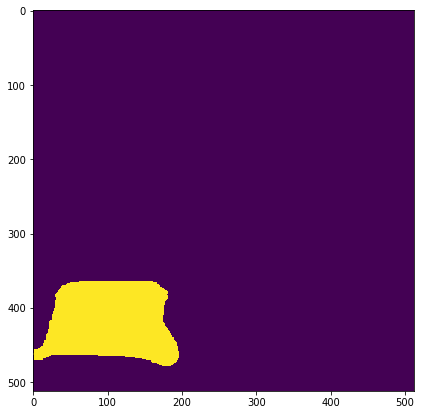

In [0]:
# # contours = np.array( [ [50,50], [50,150], [150, 150], [150,50] ] )
# img = np.zeros( (h,w) ) # create a single channel 200x200 pixel black image 
# cv2.fillPoly(img, pts =[contours[0]], color=(255,255,255))
# plt.imshow(img)
# plt.show()

number of vertebrae:  4


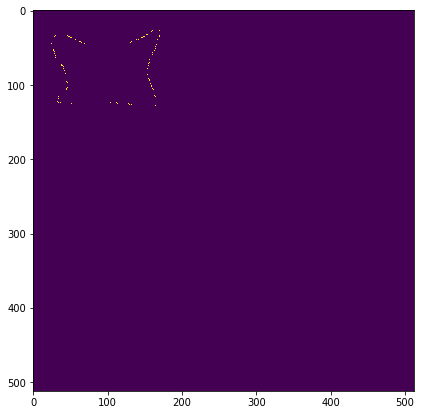

In [0]:
# print("number of vertebrae: ",len(contours_area))
# mask1_01=np.zeros((h,w))

# cv2.drawContours(mask1_01, contours[3], -1, (255), thickness=cv2.FILLED) 
# #cv2.fillPoly((mask1_01, pts=[contours], color=(255,255,255))

# plt.imshow(mask1_01)
# plt.show()